### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  **gender**: male, female
    -  **age**: below 21, 21 to 25, 26 to 30, etc.
    -  **maritalStatus**: single, married partner, unmarried partner, or widowed
    -  **has_children**: Number of children: 0, 1, or more than 1
    -  **education**: high school, bachelors degree, associates degree, or graduate degree
    -  **occupation**: architecture & engineering, business & financial, etc.
    -  **income**: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  **car**: empty column<br>
    -  **bar**: Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  **CarryAway**: Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  **CoffeeHouse** Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  **RestaurantLessThan20**: Number of times that he/she eats at a restaurant with <br>
    average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  **bar**: Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    - **toCoupon_GEQ5min**: Indicates whether the travel time to the coupon redemption location is 5 minutes or more.
    - **toCoupon_GEQ15min**: Indicates whether the travel time to the coupon redemption location is 15 minutes or more.
    - **toCoupon_GEQ25min**: Indicates whether the travel time to the coupon redemption location is 25 minutes or more.
    
<br>
2. Contextual attributes
    - **destination**: Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - **weather**: sunny, rainy, or snowy
    - **temperature**: 30F, 55F, or 80F
    - **time**: 10AM, 2PM, or 6PM
    - **passenger**: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - **coupon**: type of coupon received
    - **expiration**: time before it expires: 2 hours or one day
    

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Exploratory Data Analysis (EDA)

**Understanding the data**: Identifying the number of features, records, missing values, and data types.

**Summarizing main characteristics**: Often through statistical summaries and data visualization.

**Identifying patterns and relationships**: Noting correlations, patterns, and trends among the data features.

**Spotting anomalies and outliers**: Detecting unusual data points that deviate from the norm.

**Formulating hypotheses for further analysis**: Based on initial findings, hypotheses can be developed which may later be tested using more detailed statistical analysis.

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [4]:
# Set the option to display all columns (None means no limit)
pd.set_option('display.max_columns', None)

# Now when you use head(), all columns will be displayed
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
data.shape

(12684, 26)

### Data Cleanup

**Cleaning**: This involves removing or correcting inaccuracies, errors, and inconsistencies in the data. For example, fixing typographical errors or inconsistencies in naming conventions.

**Handling Missing Data**: Deciding how to address missing values in the dataset—whether to impute them using statistical methods (mean, median, mode, etc.), predict them using more complex algorithms, or simply remove the data points or features that have missing values.

**Data Transformation**: This could include normalizing or scaling data so that it fits within a specific scale, like 0-1 or -1 to 1, making it easier to compare and analyze.

**Data Integration**: If there are multiple datasets, this step may involve combining them into a single consistent dataset.

**Data Reduction**: Reducing complexity of data by removing irrelevant features, aggregating data, or using dimensionality reduction techniques.

**Standardization**: Converting data into a common format that allows analysts to perform comparisons and analysis more effectively.

**Feature Engineering**: Creating new features or modifying existing ones to improve the predictive power of the machine learning models.

#### Standardize column name

In [8]:
# Rename columns
data.rename(columns={
    'passanger': 'passenger',       # correct spelling 
    'maritalStatus': 'marital_status',
    'Bar': 'bar',
    'CoffeeHouse': 'coffee_house',
    'CarryAway': 'carry_away',
    'RestaurantLessThan20': 'restaurant_less_than_20', 
    'Restaurant20To50': 'restaurant_20_to_50',
    'toCoupon_GEQ5min': 'to_coupon_geq5min', 
    'toCoupon_GEQ15min': 'to_coupon_geq15min', 
    'toCoupon_GEQ25min': 'to_coupon_geq25min',
    'Y': 'y'
}, inplace=True)

# Print out the column names after the rename step
data.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'marital_status', 'has_children',
       'education', 'occupation', 'income', 'car', 'bar', 'coffee_house',
       'carry_away', 'restaurant_less_than_20', 'restaurant_20_to_50',
       'to_coupon_geq5min', 'to_coupon_geq15min', 'to_coupon_geq25min',
       'direction_same', 'direction_opp', 'y'],
      dtype='object')

#### Standardize text formats

In [9]:
# Standardizing text formats
data['coupon'] = data['coupon'].replace({
    'Restaurant\(\<20\)': 'Restaurant_Less_Than_20',
    'Restaurant\(20-50\)': 'Restaurant_20_to_50',
    'Carry out & Take away': 'Carry_Out_Take_Away'
}, regex=True)

# Standardize income ranges
data['income'] = data['income'].str.replace('−', '-')
data['income'] = data['income'].str.replace(' - ', '-')


# Clean the income column
data['income'] = data['income'].str.replace('$', '').str.replace(',', '').str.strip()

# Replace the "~" with "-" in the 'restaurant_less_than_20' column
data['restaurant_less_than_20'] = data['restaurant_less_than_20'].str.replace('~', '-', regex=False)

# Replace the "~" with "-" in the 'restaurant_20_to_50' column
data['restaurant_20_to_50'] = data['restaurant_20_to_50'].str.replace('~', '-', regex=False)

# Replace the "~" with "-" in the 'carry_away' column
data['carry_away'] = data['carry_away'].str.replace('~', '-', regex=False)

# Clean and standardize occupation entries
data['occupation'] = data['occupation'].str.replace('&', ' & ', regex=False)
data['occupation'] = data['occupation'].str.replace(r'\s{2,}', ' ', regex=True)  # Clean up multiple spaces
data['occupation'] = data['occupation'].str.title()  # Convert to title case
data['occupation'] = data['occupation'].str.strip()  # Trim whitespace

# Convert 'occupation' column to categorical
data['occupation'] = pd.Categorical(data['occupation'])

#### Handling missing data

In [10]:
# Replace NaN in specific columns with a placeholder or most frequent value
for column in ['coffee_house', 'carry_away', 'bar', 'restaurant_20_to_50', 'restaurant_less_than_20']:
    most_common = data[column].mode()[0]
    data[column].fillna(most_common, inplace=True)
    
# Fill NaN values for 'car' as 'Unknown'
data['car'] = data['car'].fillna('Unknown')


#### Data Transformations

<br>

**age** column - Replace "below21" and "50plus": Assign numeric values to these categories. Convert the entire column to integer data type to facilitate numerical operations.

In [11]:
# Convert data types
categorical_columns = ['destination', 'passenger', 'weather', 'time', 'income', 'bar',
                       'coupon', 'expiration', 'gender', 'marital_status', 'education', 'occupation']
for col in categorical_columns:
    data[col] = data[col].astype('category')
    
    
# Replace '50plus' with 55 and 'below21' with 21 
data['age'] = data['age'].replace({'50plus': '55', 'below21': '21'})
# Now convert the entire column to integer
data['age'] = data['age'].astype(int)

# Clean and standardize the 'bar' column
data['bar'] = data['bar'].replace({
    'less1': 'Less than 1',
    '1~3': '1-3 times',
    '4~8': '4-8 times',
    'gt8': 'More than 8',
}).replace('never', 'Never')

# Convert 'bar' column to categorical
data['bar'] = pd.Categorical(data['bar'], categories=['Never', 'Less than 1', 
                                                                        '1-3 times', '4-8 times', 
                                                                        'More than 8'], ordered=True)


# Clean and standardize the 'coffee_house' column
data['coffee_house'] = data['coffee_house'].replace({
    'less1': 'Less than 1',
    '1~3': '1-3 times',
    '4~8': '4-8 times',
    'gt8': 'More than 8',
    'never': 'Never'
})

# Convert 'coffee_house' column to categorical
data['coffee_house'] = pd.Categorical(data['coffee_house'], categories=['Never', 'Less than 1', 
                                                                        '1-3 times', '4-8 times', 
                                                                        'More than 8'], ordered=True)

# Clean and standardize the 'carry_away' column
data['carry_away'] = data['carry_away'].replace({
    'less1': 'Less than 1',
    'gt8': 'More than 8',
    'never': 'Never',
    '1-3': '1-3 times',
    '4-8': '4-8 times'
})

# Convert 'carry_away' column to categorical
data['carry_away'] = pd.Categorical(data['carry_away'], categories=['Never', 'Less than 1', 
                                                                    '1-3 times', '4-8 times', 
                                                                    'More than 8'], ordered=True)

# Clean and standardize the 'restaurant_less_than_20' column
data['restaurant_less_than_20'] = data['restaurant_less_than_20'].replace({
    'less1': 'Less than 1',
    'gt8': 'More than 8',
    'never': 'Never',
    '1-3': '1-3 times',
    '4-8': '4-8 times'
})

# Convert 'restaurant_less_than_20' column to categorical
data['restaurant_less_than_20'] = pd.Categorical(data['restaurant_less_than_20'], 
                                                 categories=['Never', 'Less than 1', 
                                                             '1-3 times', '4-8 times', 
                                                             'More than 8'], ordered=True)


# Clean and standardize the 'restaurant_20_to_50' column
data['restaurant_20_to_50'] = data['restaurant_20_to_50'].replace({
    'less1': 'Less than 1',
    'gt8': 'More than 8',
    'never': 'Never',
    '1-3': '1-3 times',
    '4-8': '4-8 times'
})

# Convert 'restaurant_20_to_50' column to categorical
data['restaurant_20_to_50'] = pd.Categorical(data['restaurant_20_to_50'], 
                                                 categories=['Never', 'Less than 1', 
                                                             '1-3 times', '4-8 times', 
                                                             'More than 8'], ordered=True)




In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   destination              12684 non-null  category
 1   passenger                12684 non-null  category
 2   weather                  12684 non-null  category
 3   temperature              12684 non-null  int64   
 4   time                     12684 non-null  category
 5   coupon                   12684 non-null  category
 6   expiration               12684 non-null  category
 7   gender                   12684 non-null  category
 8   age                      12684 non-null  int64   
 9   marital_status           12684 non-null  category
 10  has_children             12684 non-null  int64   
 11  education                12684 non-null  category
 12  occupation               12684 non-null  category
 13  income                   12684 non-null  category
 14  car   

In [13]:
data.isnull().sum()

# There are no null values left in any of the columns

destination                0
passenger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
marital_status             0
has_children               0
education                  0
occupation                 0
income                     0
car                        0
bar                        0
coffee_house               0
carry_away                 0
restaurant_less_than_20    0
restaurant_20_to_50        0
to_coupon_geq5min          0
to_coupon_geq15min         0
to_coupon_geq25min         0
direction_same             0
direction_opp              0
y                          0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [14]:
(((data['y']==1).sum() / data.shape[0]) * 100).round(2)

56.84

5. Use a bar plot to visualize the `coupon` column.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


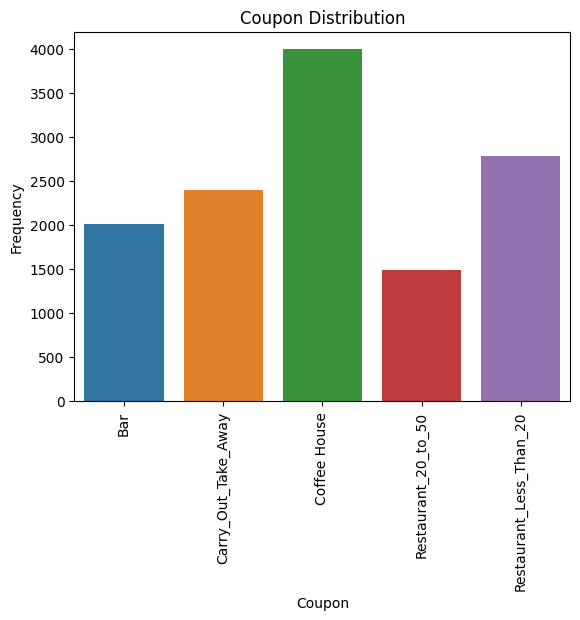

In [15]:
sns.countplot(data=data, x='coupon')
plt.title('Coupon Distribution')
plt.xlabel('Coupon')
plt.ylabel('Frequency')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

6. Use a histogram to visualize the temperature column.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


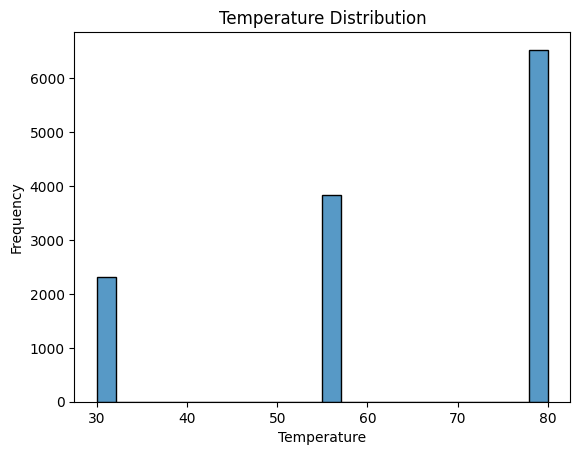

In [16]:
sns.histplot(data=data, x='temperature', kde=False)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
df_bar = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [18]:
(((df_bar['y']==1).sum() / df_bar.shape[0]) * 100).round(2)

41.0

41.0 % of the bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
# Filter the DataFrame for the specified categories
filtered_df = df_bar.query('bar in ["Never", "Less than 1", "1-3 times"]')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filtered_df['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filtered_df.shape[0]) * 100).round(2)

print(f"Acceptance rate between people who went to a bar 3 or fewer times a month : {acceptance_rate}%")

Acceptance rate between people who went to a bar 3 or fewer times a month : 37.07%


In [20]:
# Filter the DataFrame for the specified categories
filtered_df = df_bar.query('bar in ["4-8 times", "More than 8"]')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filtered_df['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filtered_df.shape[0]) * 100).round(2)

print(f"Acceptance rate between people who went to a bar 4 or more times a month : {acceptance_rate}%")

Acceptance rate between people who went to a bar 4 or more times a month : 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
# Filter the DataFrame for the specified categories
filtered_df = df_bar.query('(bar in ["1-3 times", "4-8 times", "More than 8"]) & age > 25')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filtered_df['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filtered_df.shape[0]) * 100).round(2)

print(f"Acceptance rate for people who went to a bar more than once a month")
print(f"and are over 25 years old is : {acceptance_rate}%")

Acceptance rate for people who went to a bar more than once a month
and are over 25 years old is : 69.52%


In [22]:
# Filter the DataFrame for the specified categories
filtered_df = df_bar.query('bar in ["Never", "Less than 1"] & age > 25')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filtered_df['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filtered_df.shape[0]) * 100).round(2)

print(f"Acceptance rate for people who never went to the bar")
print(f"and are over 25 years old is: {acceptance_rate}%")

Acceptance rate for people who never went to the bar
and are over 25 years old is: 26.35%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [23]:
# Filter the DataFrame for the specified categories
filter_df = df_bar.query('(bar in ["1-3 times", "4-8 times", "More than 8"]) \
                            & passenger not in ["Kid(s)", "Alone"] \
                            & occupation not in ["Farming Fishing & Forestry"]')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_df['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_df.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers who go to bars more than once a month")
print(f"and had passengers that were not a kid and had occupations other ")
print(f"than farming, fishing, or forestry: {acceptance_rate}%")

Acceptance rate for drivers who go to bars more than once a month
and had passengers that were not a kid and had occupations other 
than farming, fishing, or forestry: 71.79%


In [24]:
# Filter the DataFrame for the specified categories
filter_df = df_bar.query('(bar in ["Never", "Less than 1"]) \
                            & passenger not in ["Kid(s)", "Alone"] \
                            & occupation not in ["Farming Fishing & Forestry"]')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_df['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_df.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers who go to bars once a month or less")
print(f"and had passengers that were not a kid and had occupations other ")
print(f"than farming, fishing, or forestry: {acceptance_rate}%")

Acceptance rate for drivers who go to bars once a month or less
and had passengers that were not a kid and had occupations other 
than farming, fishing, or forestry: 37.35%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [25]:
# Filter 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
filter_group1 = df_bar.query('(bar in ["1-3 times", "4-8 times", "More than 8"]) \
                            & passenger not in ["Kid(s)"] \
                            & marital_status != "Widowed"')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_group1['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_group1.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers who go to bars once a month")
print(f"had passengers that were not a kid, and were not widowed: {acceptance_rate}%")

Acceptance rate for drivers who go to bars once a month
had passengers that were not a kid, and were not widowed: 71.32%


In [26]:
# Filter 2: go to bars more than once a month and are under the age of 30
filter_group2 = df_bar.query('(bar in ["1-3 times", "4-8 times", "More than 8"]) \
                            & age < 30')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_group2['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_group2.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers who go to bars once a month")
print(f"and are under the age of 30: {acceptance_rate}%")

Acceptance rate for drivers who go to bars once a month
and are under the age of 30: 72.17%


In [27]:
# Filter 3: go to cheap restaurants more than 4 times a month and income is less than 50K
filter_group3 = df_bar.query('(restaurant_less_than_20 in ["4-8 times", "More than 8"]) \
                            & (income in ["Less than 12500", "12500-24999", "25000-37499", "37500-49999"])')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_group3['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_group3.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers who go to cheap restaurants more than")
print(f"4 times a month and income is less than 50K: {acceptance_rate}%")

Acceptance rate for drivers who go to cheap restaurants more than
4 times a month and income is less than 50K: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Overall acceptance rate** The overall acceptance rate for bar coupons is 41%

**Frequency of bar visits** Drivers who frequent bars 4 or more times a month, have a higher acceptance rate (76.88%) compared to those who go three times or fewer (37.07%). Bar goers are more inclined to accept bar-related coupons. 

**Age factor** Drivers over the age of 25 who go to a bar more than once a month have a higher acceptance rate (69.52%) compared to those who never go (26.35%). Age and frquency of bar visits seem to correlate with a higher likelyhood of accepting bar coupons. 

**Passenger type and occupation** Drivers who go to bars more than once a month, had passengers that were not kids, and had non-farming/fishing/forestry occupations showed a higher acceptance rate (71.79%) compared to their less frequent counterparts (37.35%). This highlights that drivers without children as passengers and specific occupations might have more leisure time and as a result, are more likely to accept offers to leisure activities like bars.

Social lifestyle - Drivers who frequently visit bars and are generally younger or not constrained by family responsibilities (like having children or being widowed) are more likely to accept bar coupons. Such offers are more attractive because of their more active lifestyle. 

Overall, the data suggests a strong correlation between lifestyle choices (frequency of bar visits, age, family status, and occupation) and the likelyhood of accepting bar coupons. These insights could be valuable for targeted marketing strategies, offering bar related promotions to demographics more likely to accept and benefit from them. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Coffee House Coupon Acceptance

1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [28]:
df_coffeeHouse = data.query('coupon == "Coffee House"')



### Scenario 1: Frequency of Coffee House Visits and Coupon Acceptance

**Objective**: Analyze the acceptance rate of coffee house coupons based on how frequently the passengers visit coffee houses.

**Filters:**

**Frequent Visitors:** Drivers who visit coffee houses more than 4 times a month.<br>
**Infrequent Visitors:** Drivers who visit coffee houses up to 3 times a month.<br>
**Non-Visitors:** Driers who never visit coffee houses.

In [29]:
# Filter 1: Drivers who visit coffee houses more than 4 times a month.
filter_group1 = df_coffeeHouse.query('(bar in ["4-8 times", "More than 8"])')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_group1['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_group1.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers who visit coffee houses more than 4 times a month: {acceptance_rate}%")

Acceptance rate for drivers who visit coffee houses more than 4 times a month: 50.72%


In [30]:
# Filter 2: Drivers who visit coffee houses up to 3 times a month
filter_group2 = df_coffeeHouse.query('(bar in ["Never", "Less than 1", "1-3 times"])')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_group2['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_group2.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers who visit")
print(f"coffee houses up to 3 times a month: {acceptance_rate}%")

Acceptance rate for drivers who visit
coffee houses up to 3 times a month: 49.81%


In [31]:
# Filter 3: Driers who never visit coffee houses
filter_group3 = df_coffeeHouse.query('(bar in ["Never"])')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_group3['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_group3.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers who never visit coffee houses: {acceptance_rate}%")

Acceptance rate for drivers who never visit coffee houses: 49.25%


### Scenario 2: Effect of Passenger Type on Coffee House Coupon Acceptance


**Objective**: Explore whether having certain types of passengers affects the likelihood of accepting coffee house coupons.

**Filters:**

**Alone:** The driver is alone.<br>
**With Kids:** The driver has kids as passengers.<br>
**With Friends:** The driver is with friends.

In [32]:
# Filter 1: The driver is alone
filter_group1 = df_coffeeHouse.query('(passenger == "Alone")')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_group1['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_group1.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers who are alone: {acceptance_rate}%")

Acceptance rate for drivers who are alone: 43.79%


In [33]:
# Filter 2: The driver has kids as passengers
filter_group2 = df_coffeeHouse.query('(passenger == "Kid(s)")')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_group2['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_group2.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers that have kids passengers: {acceptance_rate}%")

Acceptance rate for drivers that have kids passengers: 48.31%


In [34]:
# Filter 3: The driver is with friends
filter_group3 = df_coffeeHouse.query('(passenger == "Friend(s)")')

# Count the number of occurrences of 1's in the 'y' column
accepted_count = (filter_group3['y'] == 1).sum()

# Calculate the acceptance rate
acceptance_rate = ((accepted_count / filter_group3.shape[0]) * 100).round(2)

print(f"Acceptance rate for drivers that have kids passengers: {acceptance_rate}%")

Acceptance rate for drivers that have kids passengers: 59.69%


Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Habitual coffee drinkers are more likely to accept coupons** as those who visit coffee houses frequently have the highest acceptance rate. This suggests loyalty programs might be effective for this group.

**The presence of friends significantly increases the acceptance rate** indicating that social gatherings are great opportunities for coffee house promotions. Offers that cater to group activities or social experiences could prove effective. 

**Solo drivers are less likely to accept coupons** potantially because they prefer to continue directly to their destination without interruptions. 